# HW11 Neural Networks

### Q1. (3 points)

In HW10-Q3 you found that perceptron cannot separate XOR and XNOR configurations. Here we ask you to construct neural network that can classify XOR and another that can classify XNOR. 

(Hint)You can use a multilayer network. If you like, you can write your answer on paper and submit a picture.



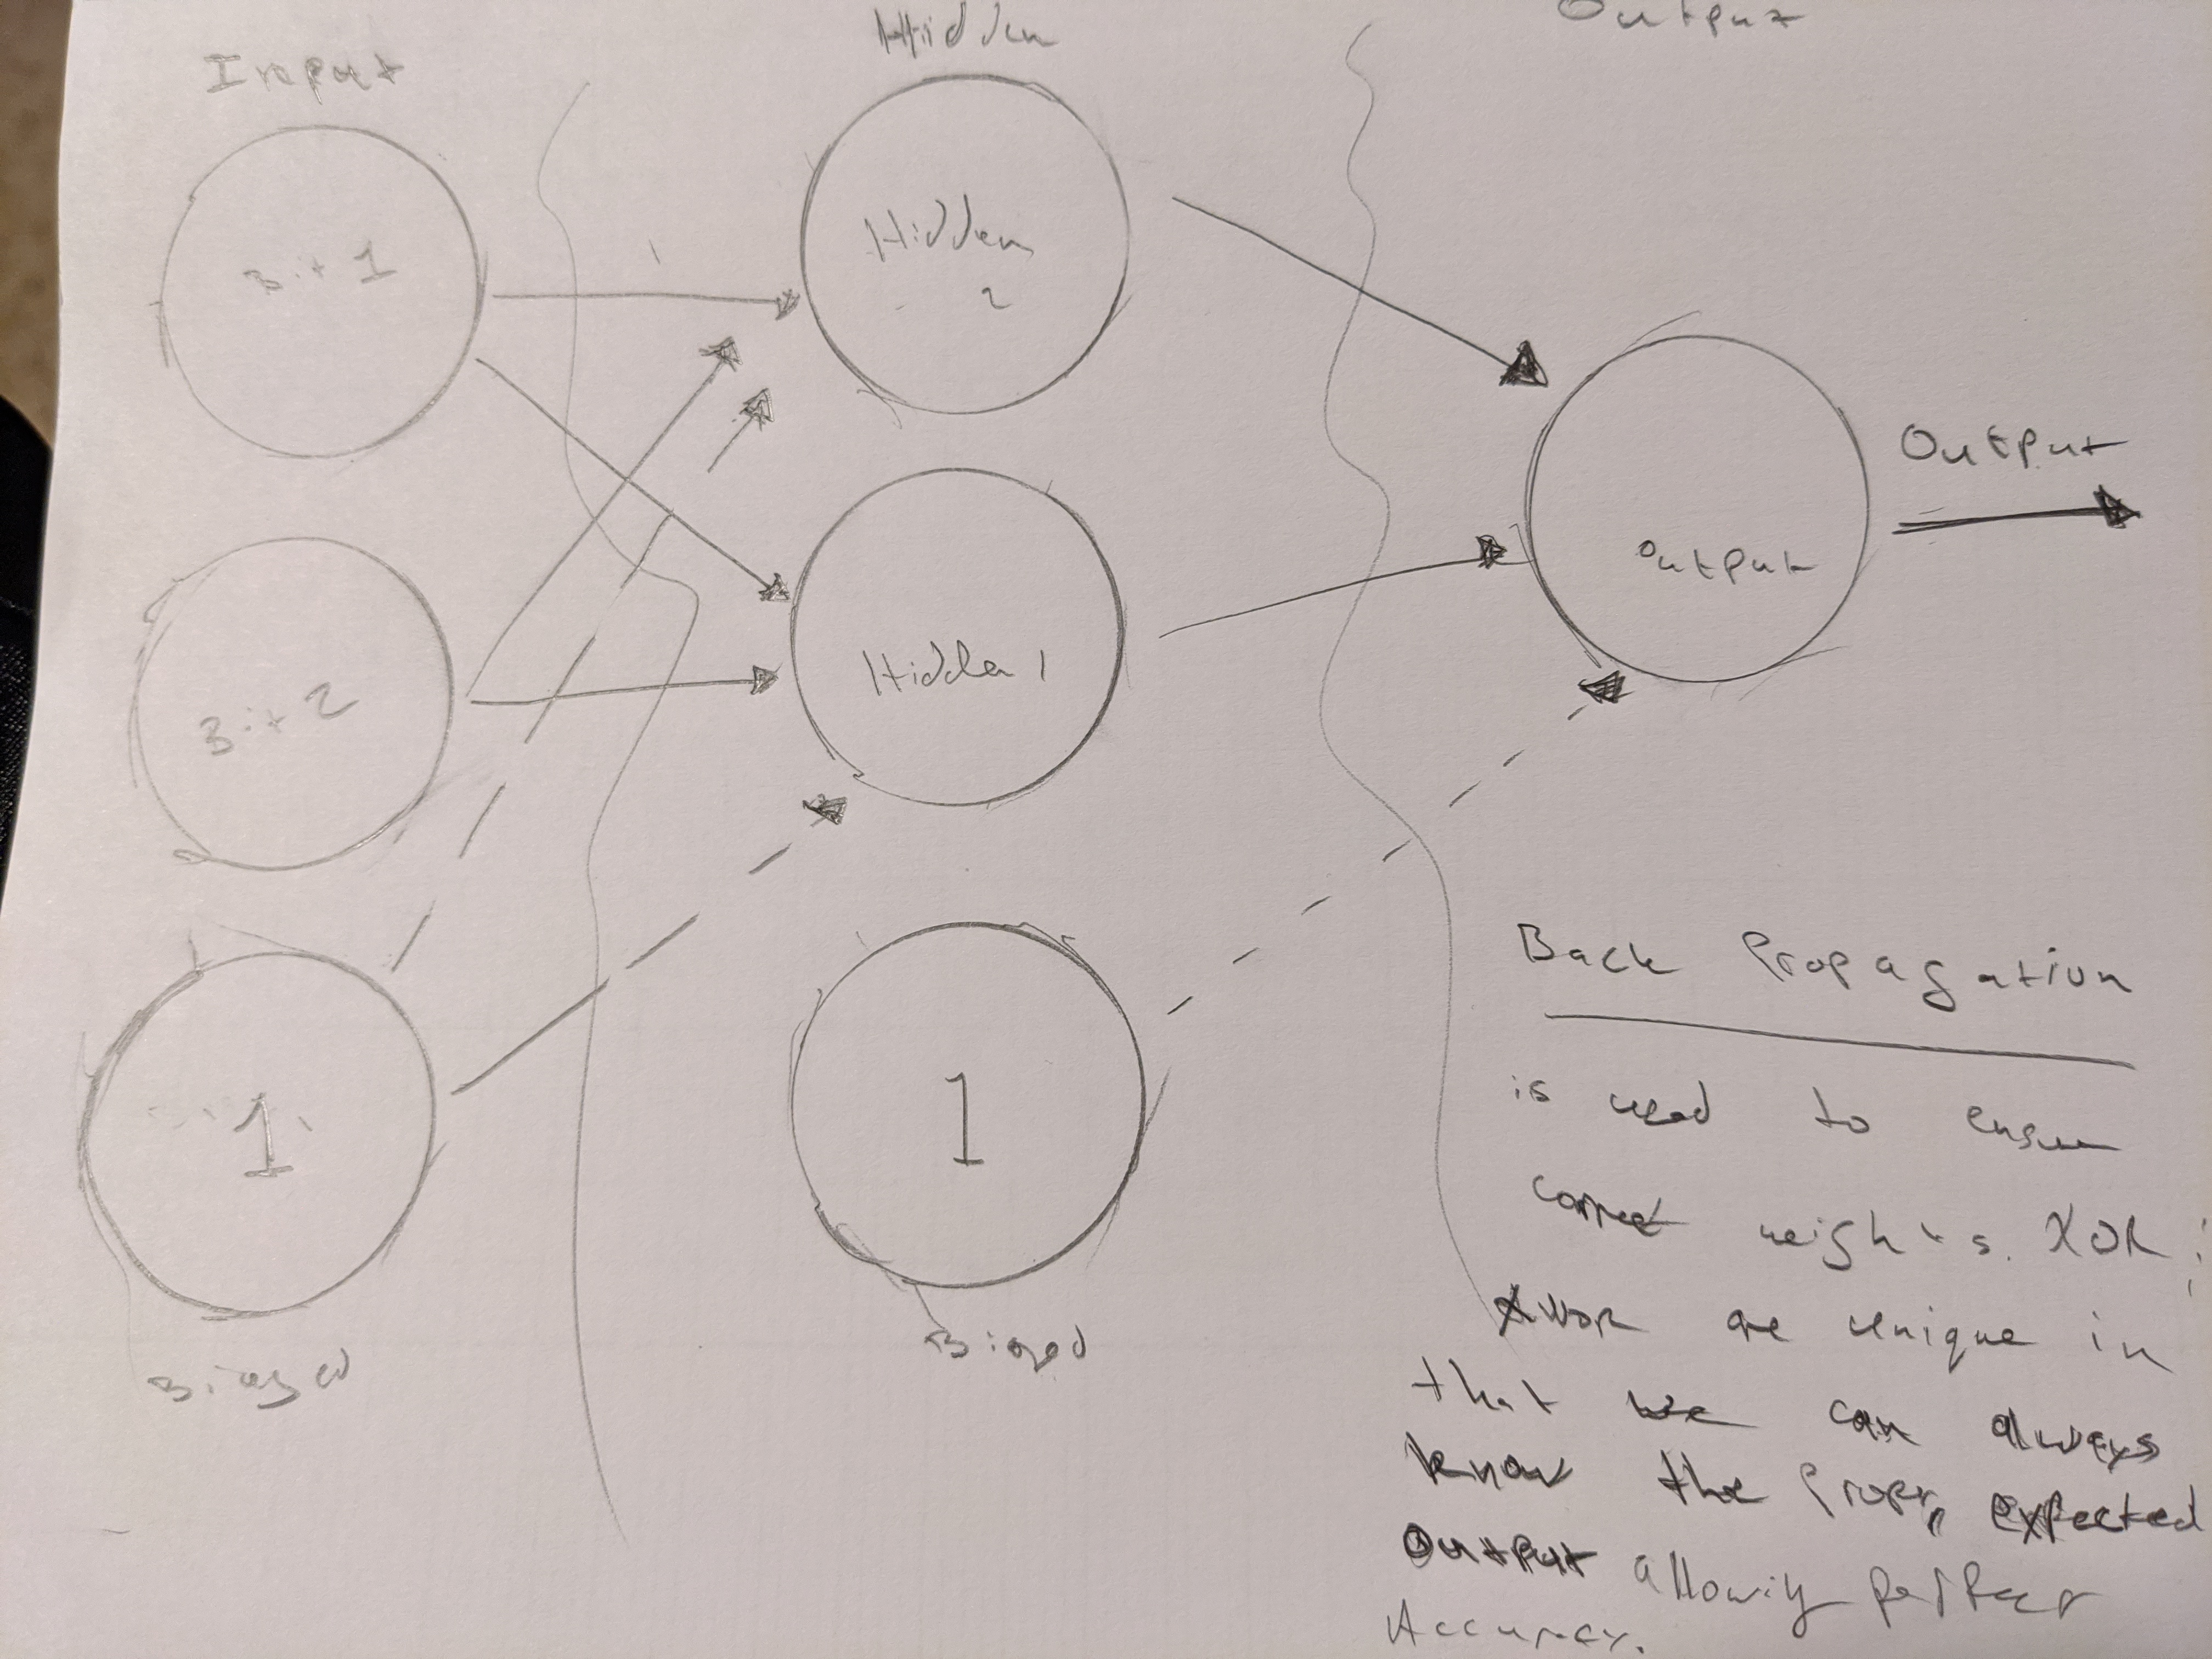

In [7]:
from IPython.display import Image

Image("data/XOR_XNOR.jpg")

### Q2. (3 points)

You have a dataset with 2 samples, x1=[2,3,4], x2=[6,8,3], and their corresponding  output variable y1=10 and y2=15. You are planning on training the neural network with the architecture below using this dataset. The weights W1 and W2 are initialized with the values.

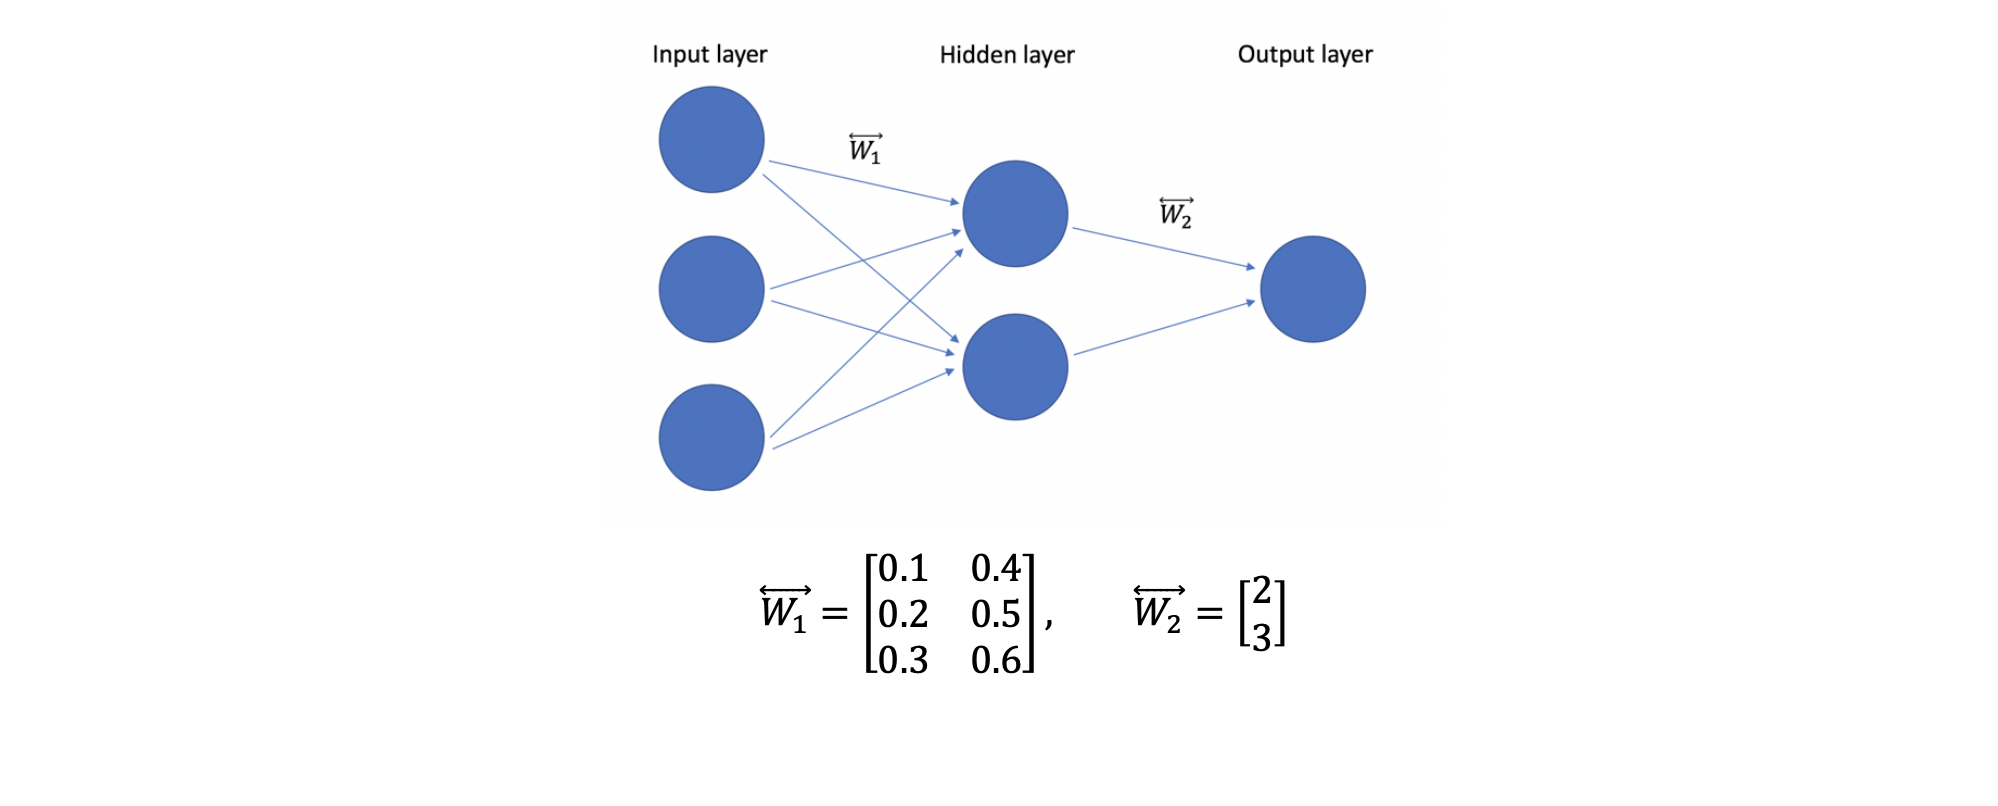

In [8]:
Image("data/Q2.png")

You decided not to include the bias term. Use 0.1 as the learning rate and the sigmoid function as the activation function for the hidden layer. (The sigmoid function is f(x) =1/(1+e^-x).)

The activation function for the output layer is linear. Calculate the weight updates for W1 and W2 and update them for the first iteration (epoch) over the dataset using the backpropagation algorithm under stochastic gradient descent with a batch size of 1. You can round all your results to two decimal places. Show all your work on a piece of paper and upload a picture of that.

## Check PDF Q2.PDF

### Q3. (4 points)

You are given a dataset X (1000 samples x 150 features) and a response variable y (1000 x 1). You should write a function that accepts X and y as its inputs and trains a Perceptron on the dataset using gradient descent. The Perceptron’s input layer is composed of 151 neurons, including the bias term.


a) Randomly initialize the weights for the perceptron. Divide your dataset into training and validation sets. Then use full gradient descent to update the weights until the Perceptron settles on a solution for the training set. Plot the validation error (MSE) over the number of iterations for the validation set. You can choose whichever learning rate your like. But explain why you selected the one you did. Also, plot the MSE vs. iterations for a learning rates that is 10 times larger and 10 times smaller than the original one that you chose.


b) Do the same thing as in (a) above. But this time use stochastic gradient descent. You now need to set at least 3 parameters: the learning rate, the batch size, and the stopping criterion. Explain why you selected the values you did for all those parameters. What would happen to the MSE vs. iterations plot for your preferred learning rate if you have a batch size of 100, 10, and 1? Plot these out. Should the choice of batch size influence your choice of learning rate and stopping criterion? Explain how those would change or why they would not.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def calculate_activation(row, weight, biasWeight: float):
    activate = biasWeight
    for i in range(len(row)):
        activate += weight[i] * row[i]
    return activate


def calculate_sigmoid(activation):
    return 1 / (1 + np.e ** (-activation))


def calculate_derivative(transfer):
    return transfer * (1 - transfer)


def calculate_layer_propagation(neuronInputs, neuronWeights, neuronBias: float):
    transfer_scores = []
    for idx, row in neuronInputs.iterrows():
        activationScore = calculate_activation(row, neuronWeights, neuronBias)
        transferScore = calculate_sigmoid(activationScore)
        transfer_scores.append(transferScore)
    return transfer_scores


def calculate_error(transferScore, expectedScore):
    return (expectedScore - transferScore) * calculate_derivative(transferScore)


def calculate_back_propagation_value(neuronWeight, outputError, transferScore):
    return (neuronWeight * outputError) * calculate_derivative(transferScore)


def calculate_updated_weight(startWeight, startBias, error, learnRate: float):
    startWeight = startWeight * error * learnRate
    startBias = learnRate * startBias
    return startBias, startWeight


def train_perceptron(descriptors, target, weight, bias: float, learnRate: float, epoch: int):
    transferScores = calculate_layer_propagation(descriptors, weights, bias)
    totalError = sum([(target[i]-transferScores[i])**2 for i in range(len(target))])
    for i in weight:
        bias, weight = calculate_updated_weight(weight, bias, totalError, learnRate)
    return


X = pd.read_csv('data/X.csv', dtype=float)
X.columns = range(X.shape[1])
y = pd.read_csv('data/y.csv', dtype=float)
y.columns = range(y.shape[1])

trainDescriptors, testDescriptors, trainTarget, testTarget = train_test_split(X, y, test_size=0.3)

bias = 0.1
learningRate = 0.1
iterations = 1
weights = np.random.random(150, )

newDescriptors = calculate_layer_propagation(trainDescriptors, weights, bias)

print(newDescriptors)

newDescriptors = calculate_layer_propagation(trainDescriptors, weights, bias*10)

print(newDescriptors)

newDescriptors = calculate_layer_propagation(trainDescriptors, weights, bias/10)

print(newDescriptors)

[1.0, 1.652581338069033e-19, 0.9999992938290314, 0.999999999999996, 0.00016552586594378188, 0.037742421517729316, 0.9999999999912481, 0.9998257322448374, 2.5457892658974055e-11, 0.0001995272741809343, 7.998989270579359e-16, 1.0, 0.9999885069463349, 0.9980737177531042, 0.5397659319622509, 0.9999999993847948, 0.9999997294334847, 0.9999999979093592, 2.2092114042748816e-12, 0.9993905572422885, 0.9999827882386579, 1.0, 6.012747896027193e-06, 0.999999999999708, 1.0, 1.0, 1.0, 0.9999999999842839, 0.9999999999836768, 1.9325903210842637e-15, 0.9999999999927831, 1.8307360861875043e-11, 0.0001709976093207501, 1.7311050934331185e-09, 3.634436898062539e-05, 1.0, 0.999914395195724, 0.9999999289761382, 5.672934520394904e-17, 0.9999999996845375, 6.52606386336307e-05, 0.9999999999996765, 1.0, 0.00020481092560214057, 3.9988654380156435e-14, 0.9977037389857916, 8.961152867779616e-18, 5.515416446828455e-10, 0.009627592662446314, 0.9999999999994005, 0.9999999130071222, 0.999782231312159, 0.8008637121057355

In [10]:
#### your code here